# Business Understanding (Toyota Dataset)

# Mulai Analisis Data Dengan membaca file Toyota

In [141]:
# import library pandas untuk membaca file CSV
import pandas as pd
data = pd.read_csv('toyota.csv')

# Tampil list 5 data terakhir teratas 
data.head()

,model,tahun,harga,transmisi,jarak_tempuh,tipe_bensin,pajak,mpg,ukuran_mesin
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [142]:
# tampil list 5 data terakhir terbawah
data.tail()

,model,tahun,harga,transmisi,jarak_tempuh,tipe_bensin,pajak,mpg,ukuran_mesin
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3
6737,Urban Cruiser,2011,4495,Manual,45128,Petrol,125,50.4,1.3


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   tahun         6738 non-null   int64  
 2   harga         6738 non-null   int64  
 3   transmisi     6738 non-null   object 
 4   jarak_tempuh  6738 non-null   int64  
 5   tipe_bensin   6738 non-null   object 
 6   pajak         6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   ukuran_mesin  6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


# Data Preparation - Cek Duplikasi data

In [144]:
data.nunique()

model             18
tahun             23
harga           2114
transmisi          4
jarak_tempuh    5699
tipe_bensin        4
pajak             29
mpg               81
ukuran_mesin      16
dtype: int64

# Data Preparation - Perhitungan Nilai

In [145]:
# Cek isnull
data.isnull()

,model,tahun,harga,transmisi,jarak_tempuh,tipe_bensin,pajak,mpg,ukuran_mesin
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6733,False,False,False,False,False,False,False,False,False
6734,False,False,False,False,False,False,False,False,False
6735,False,False,False,False,False,False,False,False,False
6736,False,False,False,False,False,False,False,False,False


In [146]:
# cek isnull dengan sum
data.isnull().sum()

model           0
tahun           0
harga           0
transmisi       0
jarak_tempuh    0
tipe_bensin     0
pajak           0
mpg             0
ukuran_mesin    0
dtype: int64

# Data preparation - Pengurangan Data

In [147]:
# menghapus pajak dari data 
data = data.drop(['pajak'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   tahun         6738 non-null   int64  
 2   harga         6738 non-null   int64  
 3   transmisi     6738 non-null   object 
 4   jarak_tempuh  6738 non-null   int64  
 5   tipe_bensin   6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   ukuran_mesin  6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.3+ KB


# Data Preparation - Menambahkan kolom data baru

In [148]:
# Import library datetime
from datetime import date
# tambah tabel umur mobil
date.today().year
data['umur_mobil']=date.today().year-data['tahun']
data.head()

,model,tahun,harga,transmisi,jarak_tempuh,tipe_bensin,mpg,ukuran_mesin,umur_mobil
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0,8
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0,7
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0,9
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0,7
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0,7


# Data Preparation - Split Data

In [149]:
data['Model_Kendaraan'] = data.model.str.split().str.get(0)
data[['Model_Kendaraan','tipe_bensin','transmisi']].head()

,Model_Kendaraan,tipe_bensin,transmisi
0,GT86,Petrol,Manual
1,GT86,Petrol,Manual
2,GT86,Petrol,Manual
3,GT86,Petrol,Manual
4,GT86,Petrol,Manual


# Data Preparation - Pembersihan Data

In [150]:
print(data.Model_Kendaraan.unique())
print(data.Model_Kendaraan.nunique())

['GT86' 'Corolla' 'RAV4' 'Yaris' 'Auris' 'Aygo' 'C-HR' 'Prius' 'Avensis'
 'Verso' 'Hilux' 'PROACE' 'Land' 'Supra' 'Camry' 'Verso-S' 'IQ' 'Urban']
18


In [151]:
# Mencari data yang terlihat salah

searchfor = ['PROACE', 'VERSO']
data[data.Model_Kendaraan.str.contains('|'.join(searchfor))].head(5)

,model,tahun,harga,transmisi,jarak_tempuh,tipe_bensin,mpg,ukuran_mesin,umur_mobil,Model_Kendaraan
6634,PROACE VERSO,2019,27998,Automatic,5,Diesel,38.7,2.0,5,PROACE
6635,PROACE VERSO,2019,27998,Automatic,10,Diesel,38.7,2.0,5,PROACE
6636,PROACE VERSO,2019,27998,Automatic,240,Diesel,38.7,2.0,5,PROACE
6637,PROACE VERSO,2019,24498,Manual,588,Diesel,40.4,2.0,5,PROACE
6638,PROACE VERSO,2019,27998,Automatic,50,Diesel,38.7,2.0,5,PROACE


In [152]:
# cek info data
# data.info()

# Mengganti PROACE VERSO ke nama Model yang benar
data['Model_Kendaraan'].replace({"PROACE" : "Proace"}, inplace=True)

new_data = data[['Model_Kendaraan','tahun','harga','umur_mobil']]
new_data[new_data['Model_Kendaraan'].str.contains('Proace')]


,Model_Kendaraan,tahun,harga,umur_mobil
6634,Proace,2019,27998,5
6635,Proace,2019,27998,5
6636,Proace,2019,27998,5
6637,Proace,2019,24498,5
6638,Proace,2019,27998,5
6639,Proace,2019,25488,5
6640,Proace,2019,28456,5
6641,Proace,2019,24990,5
6642,Proace,2019,27990,5
6643,Proace,2019,27249,5


# Analisis Data Eksplorasi

In [153]:
# Analsis data
print(data.describe())

             tahun         harga   jarak_tempuh          mpg  ukuran_mesin  \
count  6738.000000   6738.000000    6738.000000  6738.000000   6738.000000   
mean   2016.748145  12522.391066   22857.413921    63.042223      1.471297   
std       2.204062   6345.017587   19125.464147    15.836710      0.436159   
min    1998.000000    850.000000       2.000000     2.800000      0.000000   
25%    2016.000000   8290.000000    9446.000000    55.400000      1.000000   
50%    2017.000000  10795.000000   18513.000000    62.800000      1.500000   
75%    2018.000000  14995.000000   31063.750000    69.000000      1.800000   
max    2020.000000  59995.000000  174419.000000   235.000000      4.500000   

        umur_mobil  
count  6738.000000  
mean      7.251855  
std       2.204062  
min       4.000000  
25%       6.000000  
50%       7.000000  
75%       8.000000  
max      26.000000  


In [154]:
# data.describe().T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tahun,6738.0,2016.748145,2.204062,1998.0,2016.0,2017.0,2018.00,2020.0
harga,6738.0,12522.391066,6345.017587,850.0,8290.0,10795.0,14995.00,59995.0
jarak_tempuh,6738.0,22857.413921,19125.464147,2.0,9446.0,18513.0,31063.75,174419.0
mpg,6738.0,63.042223,15.836710,2.8,55.4,62.8,69.00,235.0
ukuran_mesin,6738.0,1.471297,0.436159,0.0,1.0,1.5,1.80,4.5
umur_mobil,6738.0,7.251855,2.204062,4.0,6.0,7.0,8.00,26.0


In [155]:
# Tampil semua data object include all
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
model,6738,18,Yaris,2122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tahun,6738.0,NaN,NaN,NaN,2016.748145,2.204062,1998.0,2016.0,2017.0,2018.0,2020.0
harga,6738.0,NaN,NaN,NaN,12522.391066,6345.017587,850.0,8290.0,10795.0,14995.0,59995.0
transmisi,6738,4,Manual,3826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jarak_tempuh,6738.0,NaN,NaN,NaN,22857.413921,19125.464147,2.0,9446.0,18513.0,31063.75,174419.0
tipe_bensin,6738,4,Petrol,4087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mpg,6738.0,NaN,NaN,NaN,63.042223,15.83671,2.8,55.4,62.8,69.0,235.0
ukuran_mesin,6738.0,NaN,NaN,NaN,1.471297,0.436159,0.0,1.0,1.5,1.8,4.5
umur_mobil,6738.0,NaN,NaN,NaN,7.251855,2.204062,4.0,6.0,7.0,8.0,26.0
Model_Kendaraan,6738,18,Yaris,2122,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ringkasan Statik

In [156]:
# Mengecek Tipe data
data.dtypes

model               object
tahun                int64
harga                int64
transmisi           object
jarak_tempuh         int64
tipe_bensin         object
mpg                float64
ukuran_mesin       float64
umur_mobil           int64
Model_Kendaraan     object
dtype: object

# Jumlah Object adalah: 4
# Jumlah tipe numerik adalah: 6

In [157]:
import numpy as np
# memisahkan tipe data
dataobject = data.select_dtypes(include=['object']).columns
datanumeric = data.select_dtypes(include=np.number).columns.tolist()
print("Kategori Variabel Object:")
print(dataobject)
print("Kategori Variabel Numerik:")
print(datanumeric)

Kategori Variabel Object:
Index(['model', 'transmisi', 'tipe_bensin', 'Model_Kendaraan'], dtype='object')
Kategori Variabel Numerik:
['tahun', 'harga', 'jarak_tempuh', 'mpg', 'ukuran_mesin', 'umur_mobil']


# Visualisasi Data (Histogram dan Boxplot)

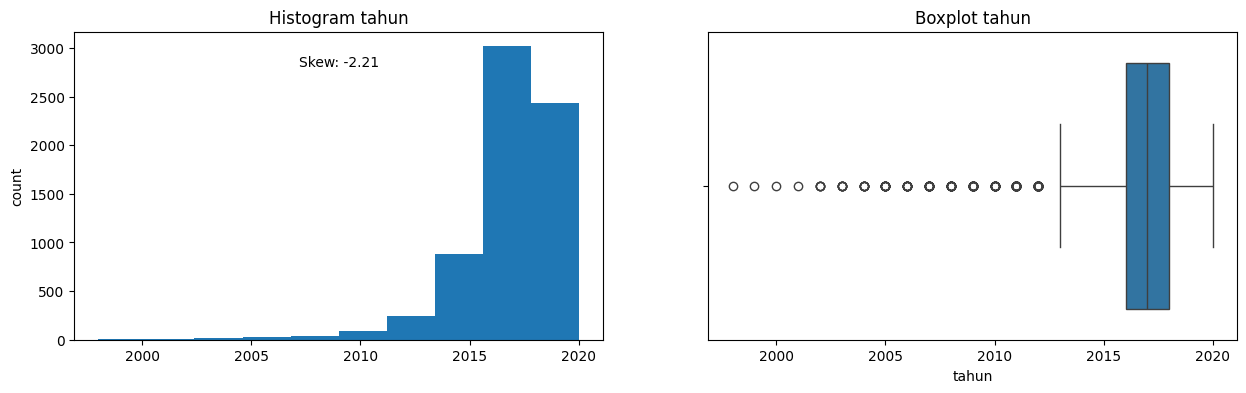

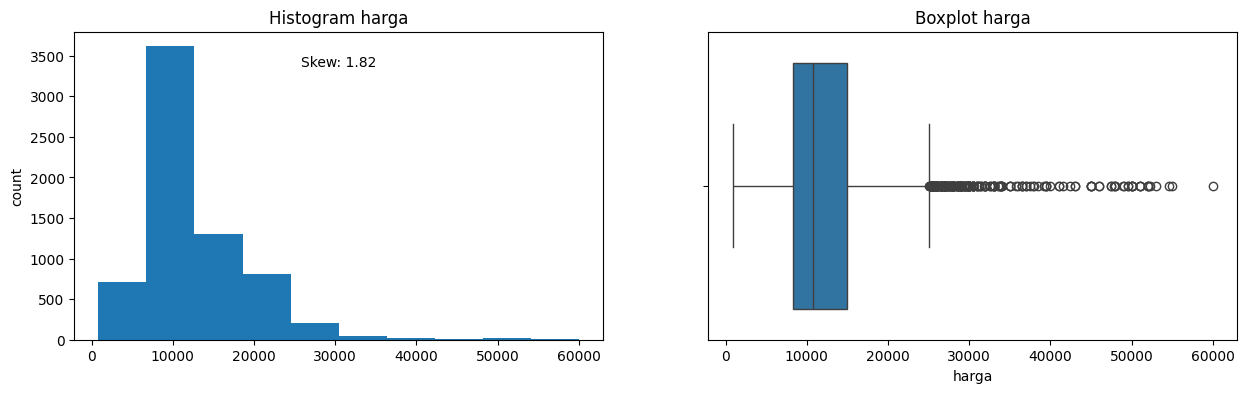

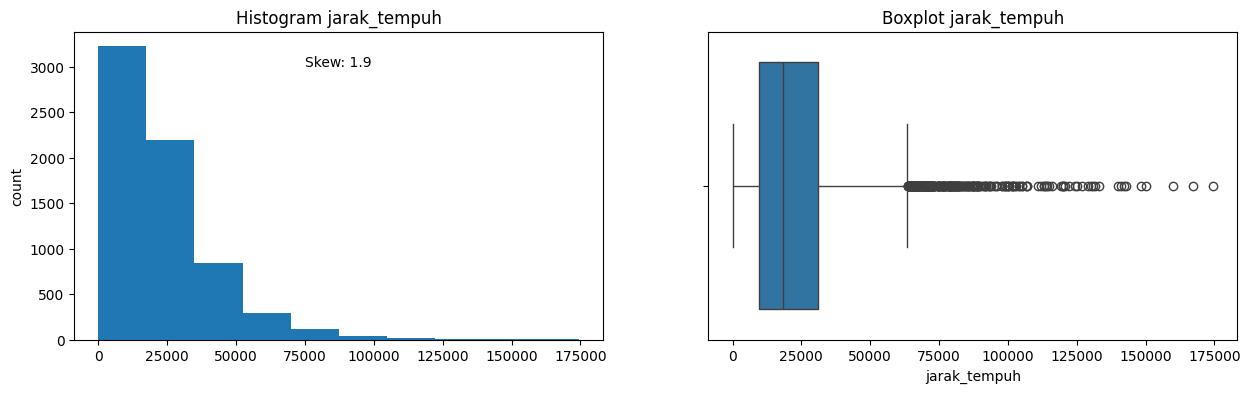

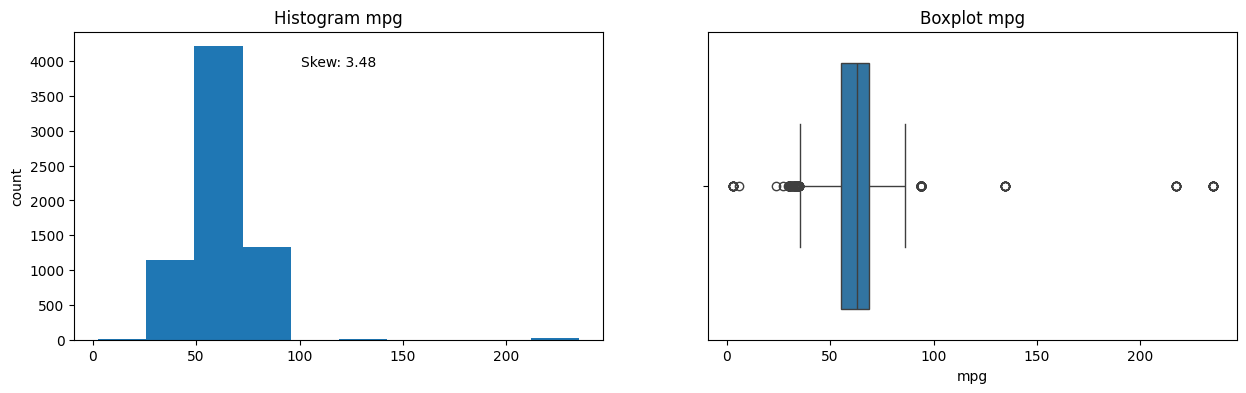

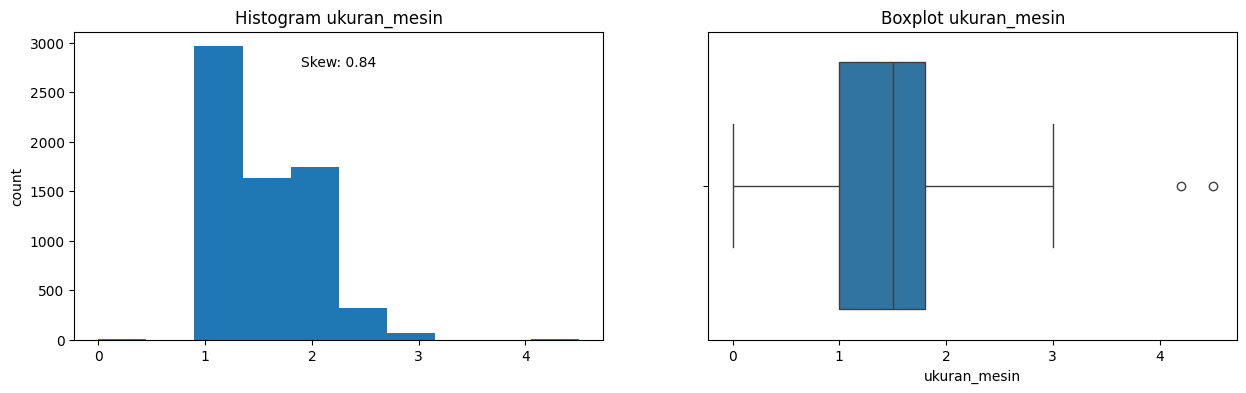

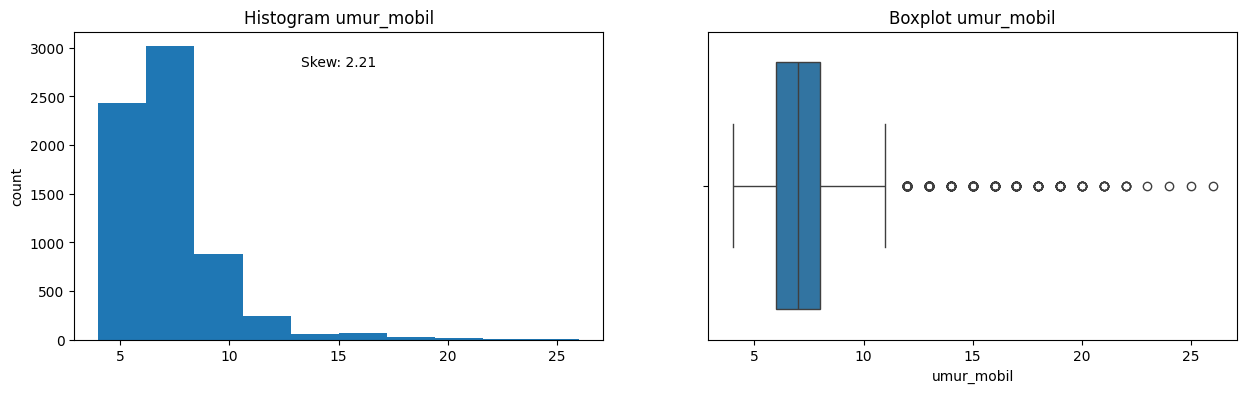

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# loop kolom di data numerik dengan menggunakan
# for
for col in datanumeric:
    plt.figure(figsize=(15, 4)) # mengatur ukuran figure box
    
    # Plot Histogram
    plt.subplot(1,2,1)
    data[col].hist(grid=False) # nonaktifkan garis
    plt.ylabel('count')
    plt.title('Histogram ' + col)
    # Hitung dan taruh teks skew di tengah gambar Plot Histogram
    skew_count = round(data[col].skew(), 2)
    plt.text(0.5, 0.9, 'Skew: {}'.format(skew_count),horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)

    # Plot Boxplot
    plt.subplot(1,2,2) # subplot memiliki 1 baris 2 kolom dan 2 plot (Histrogram dan boxplot)
    sns.boxplot(x=data[col])
    plt.title("Boxplot " + col)

    # tampil plot
    plt.show()

# Visualisasi Data (Count Plot)

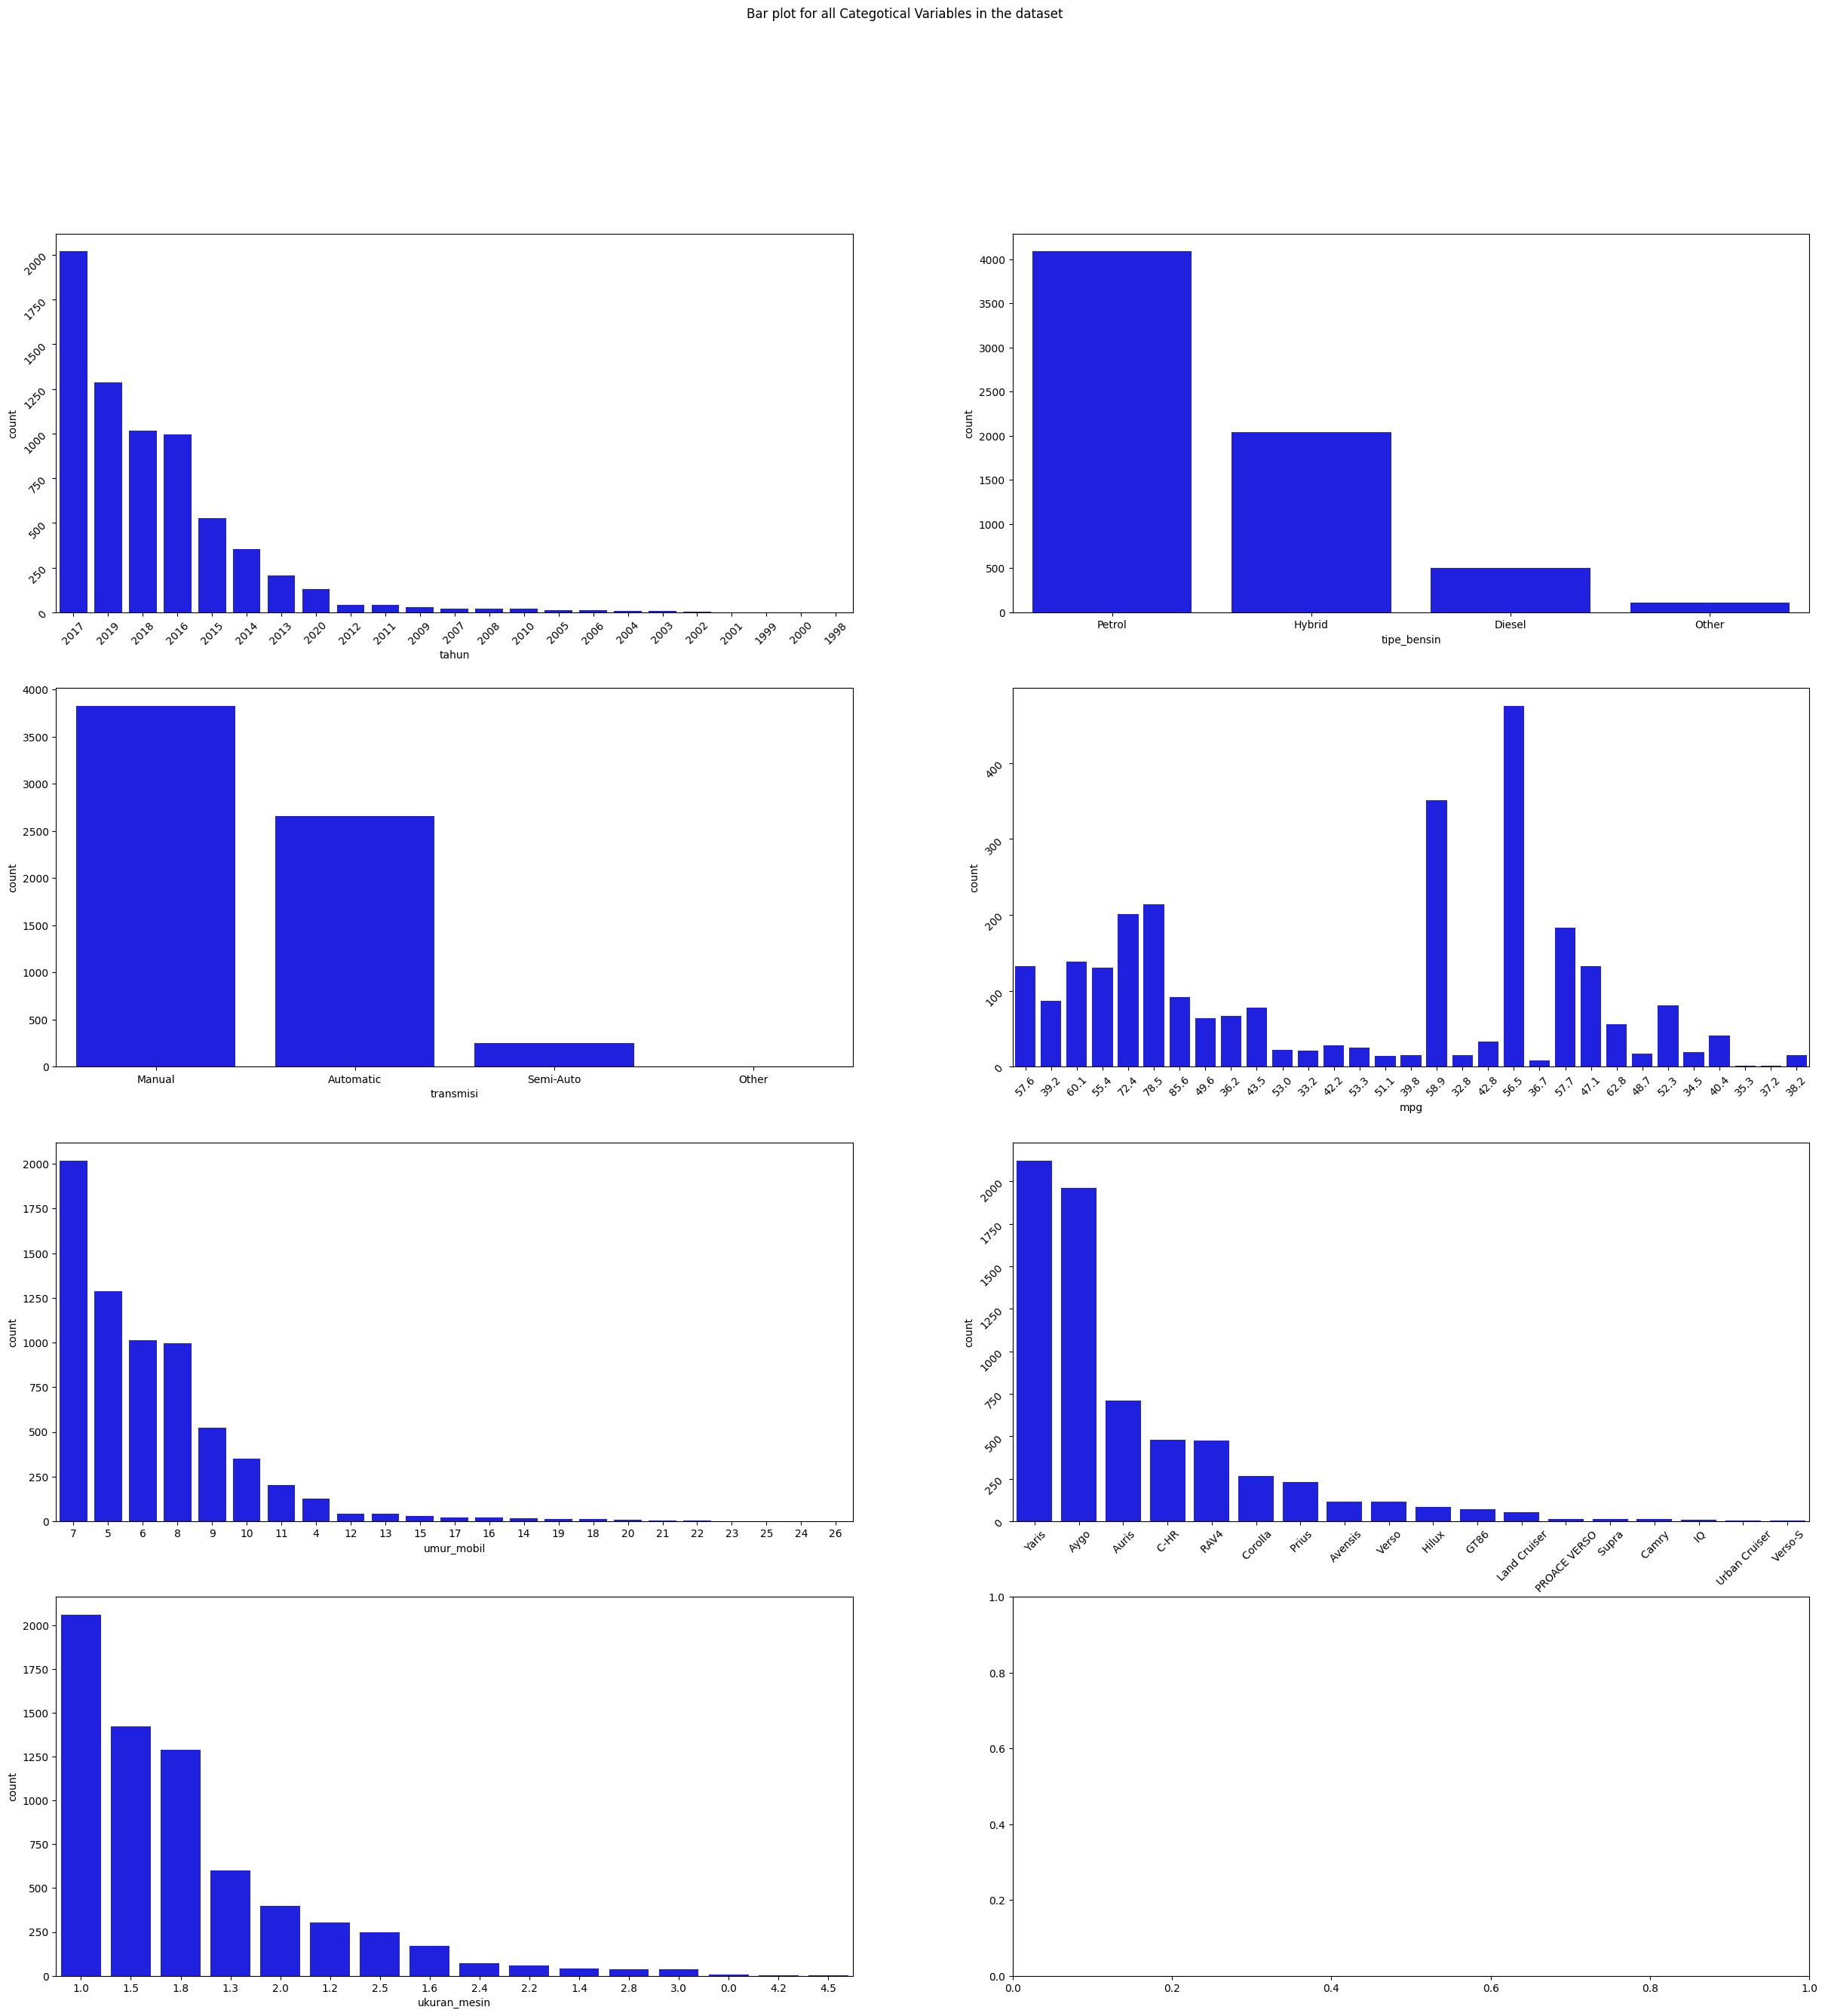

In [159]:
# Count Plot
fig, axes = plt.subplots(4,2, figsize = (30,30))
fig.suptitle('Bar plot for all Categotical Variables in the dataset')
sns.countplot(ax = axes[0,0], x = 'tahun', data = data, color = 'blue',
              order = data['tahun'].value_counts().index);
sns.countplot(ax = axes[0,1], x = 'tipe_bensin', data = data, color = 'blue',
              order = data['tipe_bensin'].value_counts().index);
sns.countplot(ax = axes[1,0], x = 'transmisi', data = data, color = 'blue',
              order = data['transmisi'].value_counts().index);
# diambil dari 750 tabel
sns.countplot(ax = axes[1,1], x = 'mpg', data = data, color = 'blue',
              order = data['mpg'].head(750).value_counts().index); 
# head digunakan untuk mengambil data awal dengan jumlah 750 
# agar performa lancar ketika 
sns.countplot(ax = axes[2,0], x = 'umur_mobil', data = data, color = 'blue',
              order = data['umur_mobil'].value_counts().index);
sns.countplot(ax = axes[2,1], x = 'model', data = data, color = 'blue',
              order = data['model'].value_counts().index);
sns.countplot(ax = axes[3,0], x = 'ukuran_mesin', data = data, color = 'blue',
              order = data['ukuran_mesin'].value_counts().index);
axes[0,0].tick_params(labelrotation=45);
axes[1,1].tick_params(labelrotation=45);
axes[2,1].tick_params(labelrotation=45);